In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
import cv2
import matplotlib.pyplot as plt
import warnings
from itertools import chain
from os import path
from time import time
from os import path

#tab_jpeg

# table K1 - Luminance quantize Matrix  
K1 = np.zeros((8, 8))
K1[0] = [ 16,  11,  10,  16,  24,  40,  51,  61]
K1[1] = [ 12,  12,  14,  19,  26,  58,  60,  55]
K1[2] = [ 14,  13,  16,  24,  40,  57,  69,  56]
K1[3] = [ 14,  17,  22,  29,  51,  87,  80,  62]
K1[4] = [ 18,  22,  37,  56,  68, 109, 103,  77]
K1[5] = [ 24,  35,  55,  64,  81, 104, 113,  92]
K1[6] = [ 49,  64,  78,  87, 103, 121, 120, 101]
K1[7] = [ 72,  92,  95,  98, 112, 100, 103,  99]

# Table K3 
# Table for luminance DC coefficient differences
K3 = dict()
K3[0] = "00"
K3[1] = "010"
K3[2] = "011"
K3[3] = "100"
K3[4] = "101"
K3[5] = "110"
K3[6] = "1110"
K3[7] = "11110"
K3[8] = "111110"
K3[9] = "1111110"
K3[10] = "11111110"
K3[11] = "111111110"

# Table K5 
# Table for luminance AC coefficients
K5 = dict()
K5[(0, 0)] = "1010"
K5[(0, 1)] = "00"
K5[(0, 2)] = "01"
K5[(0, 3)] = "100"
K5[(0, 4)] = "1011"
K5[(0, 5)] = "11010"
K5[(0, 6)] = "1111000"
K5[(0, 7)] = "11111000"
K5[(0, 8)] = "1111110110"
K5[(0, 9)] = "1111111110000010"
K5[(0,10)] = "1111111110000011"

K5[(1, 1)] = "1100"
K5[(1, 2)] = "11011"
K5[(1, 3)] = "1111001"
K5[(1, 4)] = "111110110"
K5[(1, 5)] = "11111110110"
K5[(1, 6)] = "1111111110000100"
K5[(1, 7)] = "1111111110000101"
K5[(1, 8)] = "1111111110000110"
K5[(1, 9)] = "1111111110000111"
K5[(1,10)] = "1111111110001000"

K5[(2, 1)] = "11100"
K5[(2, 2)] = "11111001"
K5[(2, 3)] = "1111110111"
K5[(2, 4)] = "111111110100"
K5[(2, 5)] = "1111111110001001"
K5[(2, 6)] = "1111111110001010"
K5[(2, 7)] = "1111111110001011"
K5[(2, 8)] = "1111111110001100"
K5[(2, 9)] = "1111111110001101"
K5[(2,10)] = "1111111110001110"

K5[(3, 1)] = "111010"
K5[(3, 2)] = "111110111"
K5[(3, 3)] = "111111110101"
K5[(3, 4)] = "1111111110001111"
K5[(3, 5)] = "1111111110010000"
K5[(3, 6)] = "1111111110010001"
K5[(3, 7)] = "1111111110010010"
K5[(3, 8)] = "1111111110010011"
K5[(3, 9)] = "1111111110010100"
K5[(3,10)] = "1111111110010101"

K5[(4, 1)] = "111011"
K5[(4, 2)] = "1111111000"
K5[(4, 3)] = "1111111110010110"
K5[(4, 4)] = "1111111110010111"
K5[(4, 5)] = "1111111110011000"
K5[(4, 6)] = "1111111110011001"
K5[(4, 7)] = "1111111110011010"
K5[(4, 8)] = "1111111110011011"
K5[(4, 9)] = "1111111110011100"
K5[(4,10)] = "1111111110011101"

K5[(5, 1)] = "1111010"
K5[(5, 2)] = "11111110111"
K5[(5, 3)] = "1111111110011110"
K5[(5, 4)] = "1111111110011111"
K5[(5, 5)] = "1111111110100000"
K5[(5, 6)] = "1111111110100001"
K5[(5, 7)] = "1111111110100010"
K5[(5, 8)] = "1111111110100011"
K5[(5, 9)] = "1111111110100100"
K5[(5,10)] = "1111111110100101"

K5[(6, 1)] = "1111011"
K5[(6, 2)] = "111111110110"
K5[(6, 3)] = "1111111110100110"
K5[(6, 4)] = "1111111110100111"
K5[(6, 5)] = "1111111110101000"
K5[(6, 6)] = "1111111110101001"
K5[(6, 7)] = "1111111110101010"
K5[(6, 8)] = "1111111110101011"
K5[(6, 9)] = "1111111110101100"
K5[(6,10)] = "1111111110101101"

K5[(7, 1)] = "11111010"
K5[(7, 2)] = "111111110111"
K5[(7, 3)] = "1111111110101110"
K5[(7, 4)] = "1111111110101111"
K5[(7, 5)] = "1111111110110000"
K5[(7, 6)] = "1111111110110001"
K5[(7, 7)] = "1111111110110010"
K5[(7, 8)] = "1111111110110011"
K5[(7, 9)] = "1111111110110100"
K5[(7,10)] = "1111111110110101"

K5[(8, 1)] = "111111000"
K5[(8, 2)] = "111111111000000"
K5[(8, 3)] = "1111111110110110"
K5[(8, 4)] = "1111111110110111"
K5[(8, 5)] = "1111111110111000"
K5[(8, 6)] = "1111111110111001"
K5[(8, 7)] = "1111111110111010"
K5[(8, 8)] = "1111111110111011"
K5[(8, 9)] = "1111111110111100"
K5[(8,10)] = "1111111110111101"

K5[(9, 1)] = "111111001"
K5[(9, 2)] = "1111111110111110"
K5[(9, 3)] = "1111111110111111"
K5[(9, 4)] = "1111111111000000"
K5[(9, 5)] = "1111111111000001"
K5[(9, 6)] = "1111111111000010"
K5[(9, 7)] = "1111111111000011"
K5[(9, 8)] = "1111111111000100"
K5[(9, 9)] = "1111111111000101"
K5[(9,10)] = "1111111111000110"

K5[(10, 1)] = "111111010"
K5[(10, 2)] = "1111111111000111"
K5[(10, 3)] = "1111111111001000"
K5[(10, 4)] = "1111111111001001"
K5[(10, 5)] = "1111111111001010"
K5[(10, 6)] = "1111111111001011"
K5[(10, 7)] = "1111111111001100"
K5[(10, 8)] = "1111111111001101"
K5[(10, 9)] = "1111111111001110"
K5[(10,10)] = "1111111111001111"

K5[(11, 1)] = "1111111001"
K5[(11, 2)] = "1111111111010000"
K5[(11, 3)] = "1111111111010001"
K5[(11, 4)] = "1111111111010010"
K5[(11, 5)] = "1111111111010011"
K5[(11, 6)] = "1111111111010100"
K5[(11, 7)] = "1111111111010101"
K5[(11, 8)] = "1111111111010110"
K5[(11, 9)] = "1111111111010111"
K5[(11,10)] = "1111111111011000"

K5[(12, 1)] = "1111111010"
K5[(12, 2)] = "1111111111011001"
K5[(12, 3)] = "1111111111011010"
K5[(12, 4)] = "1111111111011011"
K5[(12, 5)] = "1111111111011100"
K5[(12, 6)] = "1111111111011101"
K5[(12, 7)] = "1111111111011110"
K5[(12, 8)] = "1111111111011111"
K5[(12, 9)] = "1111111111100000"
K5[(12,10)] = "1111111111100001"

K5[(13, 1)] = "11111111000"
K5[(13, 2)] = "1111111111100010"
K5[(13, 3)] = "1111111111100011"
K5[(13, 4)] = "1111111111100100"
K5[(13, 5)] = "1111111111100101"
K5[(13, 6)] = "1111111111100110"
K5[(13, 7)] = "1111111111100111"
K5[(13, 8)] = "1111111111101000"
K5[(13, 9)] = "1111111111101001"
K5[(13,10)] = "1111111111101010"

K5[(14, 1)] = "1111111111101011"
K5[(14, 2)] = "1111111111101100"
K5[(14, 3)] = "1111111111101101"
K5[(14, 4)] = "1111111111101110"
K5[(14, 5)] = "1111111111101111"
K5[(14, 6)] = "1111111111110000"
K5[(14, 7)] = "1111111111110001"
K5[(14, 8)] = "1111111111110010"
K5[(14, 9)] = "1111111111110011"
K5[(14,10)] = "1111111111110100"

K5[(15, 0)] = "11111111001"
K5[(15, 1)] = "1111111111110101"
K5[(15, 2)] = "1111111111110110"
K5[(15, 3)] = "1111111111110111"
K5[(15, 4)] = "1111111111111000"
K5[(15, 5)] = "1111111111111001"
K5[(15, 6)] = "1111111111111010"
K5[(15, 7)] = "1111111111111011"
K5[(15, 8)] = "1111111111111100"
K5[(15, 9)] = "1111111111111101"
K5[(15,10)] = "1111111111111110"

# zig-zag order
zigzag = np.zeros((8, 8))
zigzag[0] = [ 0,  1,  5,  6, 14, 15, 27, 28]
zigzag[1] = [ 2,  4,  7, 13, 16, 26, 29, 42]
zigzag[2] = [ 3,  8, 12, 17, 25, 30, 41, 43]
zigzag[3] = [ 9, 11, 18, 24, 31, 40, 44, 53]
zigzag[4] = [10, 19, 23, 32, 39, 45, 52, 54]
zigzag[5] = [20, 22, 33, 38, 46, 51, 55, 60]
zigzag[6] = [21, 34, 37, 47, 50, 56, 59, 61]
zigzag[7] = [35, 36, 48, 49, 57, 58, 62, 63]
#índice para ordenar valores de array 1D em zigzag
ind_O = zigzag.reshape((64),order='F').astype('int')
#índice para repor ordem original de array 1D em zigzag
ind_Z = np.argsort(ind_O)


#Exemplo:
np.random.seed(1)
D1=np.random.randint(-10,10,size=(8,8))
print(D1)
D1Flat=D1.flatten(order='F')
print(D1Flat)
D1zz=D1Flat[ind_Z]
print(D1zz)
D2=D1zz[ind_O].reshape((8,8),order='F')
print(D2)

##########################################################################
#
#   Function to calculate de quality factor
#
##########################################################################

def quality_factor(q):
    if(q <= 50):
        factor = 50.0 / q
    else:
        factor = 2.0 - (q * 2.0)/100.0
    return factor 

[[ -5   1   2  -2  -1   1  -5   5]
 [-10   6  -9   2  -3   3  -4   8]
 [ -5   8   1   0   4   8  -6  -1]
 [  7 -10   3  -1  -1  -3  -9 -10]
 [  7  -2   3   9   5   0  -2  -3]
 [ -7  -4   7  -7  -6   7   1   2]
 [  6   3   9  -1   8   5 -10  -6]
 [  5  -8  -3  -2  -1  -7  -3  -6]]
[ -5 -10  -5   7   7  -7   6   5   1   6   8 -10  -2  -4   3  -8   2  -9
   1   3   3   7   9  -3  -2   2   0  -1   9  -7  -1  -2  -1  -3   4  -1
   5  -6   8  -1   1   3   8  -3   0   7   5  -7  -5  -4  -6  -9  -2   1
 -10  -3   5   8  -1 -10  -3   2  -6  -6]
[ -5   1 -10  -5   6   2  -2  -9   8   7   7 -10   1   2  -1   1  -3   0
   3  -2  -7   6  -4   3  -1   4   3  -5   5  -4   8  -1   9   7   3   5
  -8   9  -7   5  -3  -6   8  -1  -9   0  -6  -1  -3  -2   8   7  -2 -10
  -3   1   5  -1  -7 -10   2  -6  -3  -6]
[[ -5   1   2  -2  -1   1  -5   5]
 [-10   6  -9   2  -3   3  -4   8]
 [ -5   8   1   0   4   8  -6  -1]
 [  7 -10   3  -1  -1  -3  -9 -10]
 [  7  -2   3   9   5   0  -2  -3]
 [ -7  -4   7  -7  -6 

In [98]:
def get_submatriz( matriz, line, col, dim):
     return matriz[line: line + dim, col : col + dim]

def aplicar_submatriz(matriz, submatriz, line, col, dim):
    matriz[line: line + dim, col : col + dim] = submatriz
    return matriz

def redimensionarMatriz(matriz, factor_mod):
    
    line_dim, col_dim = matriz.shape

    paddingLines = line_dim % factor_mod
    paddingCols = col_dim % factor_mod

    for i in range(paddingLines):
        matriz = np.delete(matriz, line_dim - 1, 0)
        line_dim -= 1

    for i in range(paddingCols):
        matriz = np.delete(matriz, col_dim - 1 , 1)
        col_dim -= 1
        
    return matriz

    
def codificador_dct(submatriz):
      
    submatriz = cv2.dct(submatriz)
           
    return submatriz
    
    
def descodificador_dct(submatriz):
    
    submatriz = cv2.idct(submatriz)
            
    return submatriz


def codificacaoJPEG(imagem):
    
    m_size = 8
    imagem = redimensionarMatriz(imagem, m_size)
    imagem = imagem * 1.0
    
    line_dim, col_dim = image.shape
    
    
    
    for line in range(int(line_dim/m_size)):
        for col in range(int(col_dim/m_size)):
            
            submatriz = get_submatriz(imagem, line * m_size, col * m_size, m_size)
            
            #Transformaçoes sobre o bloco 8x8:
            
            #Codificação DCT do bloco 8x8
            submatriz = codificador_dct(submatriz)
            
            
            
            
            
            
            
            
    return bitStream
    

#Aplicar Bloco final a imagem construindo a imagem comprimida
imagem = aplicar_submatriz(imagem, submatriz, line * m_size, col * m_size, m_size)

Imagem ANTES de ser aplicada a DCT bidimensional:


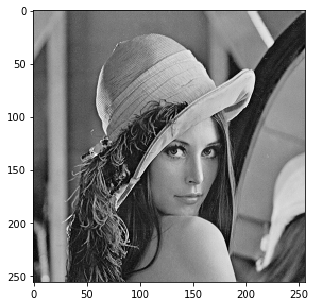

Imagem DEPOIS de ser aplicada a DCT bidimensional:


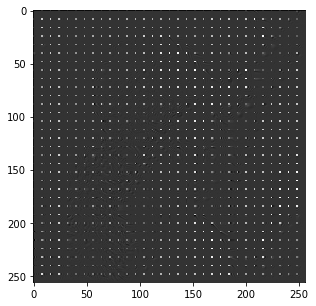

Imagem DEPOIS de ser aplicada a DCT bidimensional Inversa:


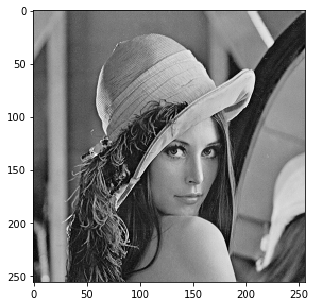

In [101]:
print("Imagem ANTES de ser aplicada a DCT bidimensional:")
input_file = "LenaS.tif"
plt.figure(figsize=(5,5))
image = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

image = codificador_dct(image)

print("Imagem DEPOIS de ser aplicada a DCT bidimensional:")
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.show()

image = descodificador_dct(image)

print("Imagem DEPOIS de ser aplicada a DCT bidimensional Inversa:")
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.show()
